In [1]:
import keras
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

import numpy as np
import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_dark'

import matplotlib.pyplot as plt

from PIL import Image

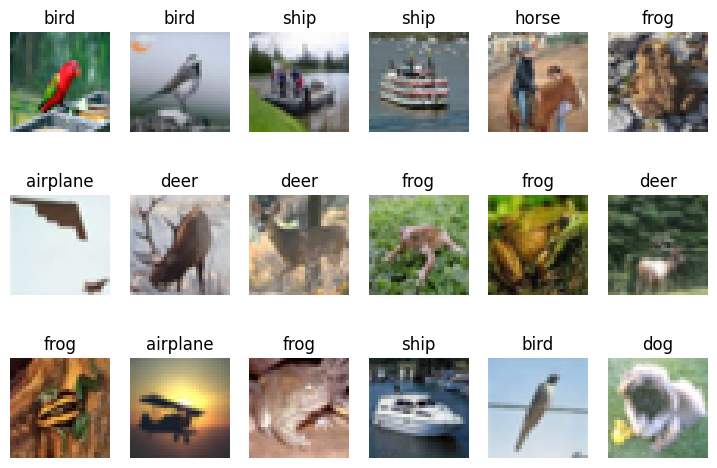

Single image size is 32 x 32 px, 3 channels


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

cols, rows = 6, 3
fig = plt.figure(figsize=(1.5 * cols, 2 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

w, h, c = X_train[0].shape
print(f"Single image size is {w} x {h} px, {c} channels")

In [3]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [4]:
max_val = X_train.max()
X_train_norm = X_train / max_val
X_test_norm = X_test / max_val

In [5]:
model = Sequential([
    Input((w, h, c)),
    Conv2D(filters=16, kernel_size=3, padding='same'),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=1),
    Dropout(0.25),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=1),
    Dropout(0.25),
    Flatten(),
    Dense(256),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()
BATCH_SIZE = 64
EPOCHS = 5

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_norm, y_train_cat, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test_norm, y_test_cat))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,258 (56.39 MB)

 Trainable params: 14,781,258 (56.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
487/782 ━━━━━━━━━━━━━━━━━━━━ 30s 105ms/step - accuracy: 0.3459 - loss: 4.4524

KeyboardInterrupt: 